In [177]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage import io, feature, measure, transform

In [178]:
img1 = io.imread('demo1.png')
img2 = io.imread('demo2.png')

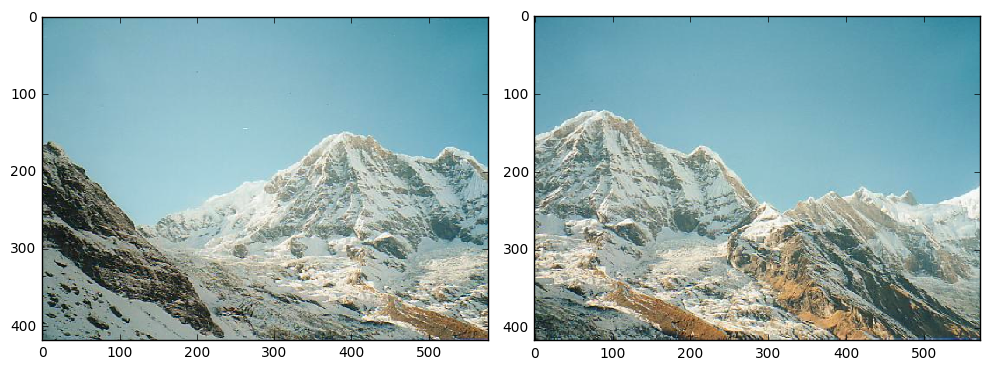

In [179]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
io.imshow(img1)
plt.subplot(1, 2, 2)
io.imshow(img2)

In [180]:
gray1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

### 1. Вычисление дескрипторов

In [242]:
sift = cv2.BRISK()
# sift = cv2.SIFT() #another cv2 version

In [243]:
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

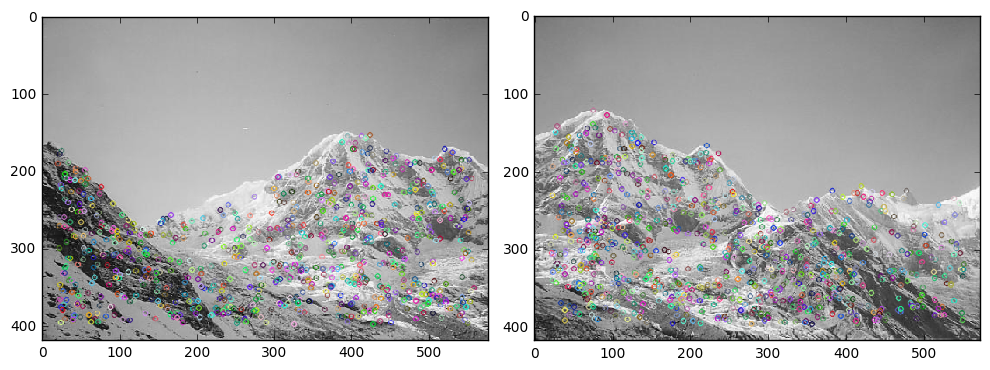

In [183]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
io.imshow(cv2.drawKeypoints(gray1,kp1))
plt.subplot(1, 2, 2)
io.imshow(cv2.drawKeypoints(gray2,kp2))

### 2. Сопоставление

In [244]:
matches = feature.match_descriptors(des1, des2, cross_check=True)

In [185]:
matches.shape

(244, 2)

In [245]:
kps1 = np.stack(np.vectorize(lambda kp: (kp.pt[1], kp.pt[0]))(np.array(kp1)), axis=1)
kps2 = np.stack(np.vectorize(lambda kp: (kp.pt[1], kp.pt[0]))(np.array(kp2)), axis=1)

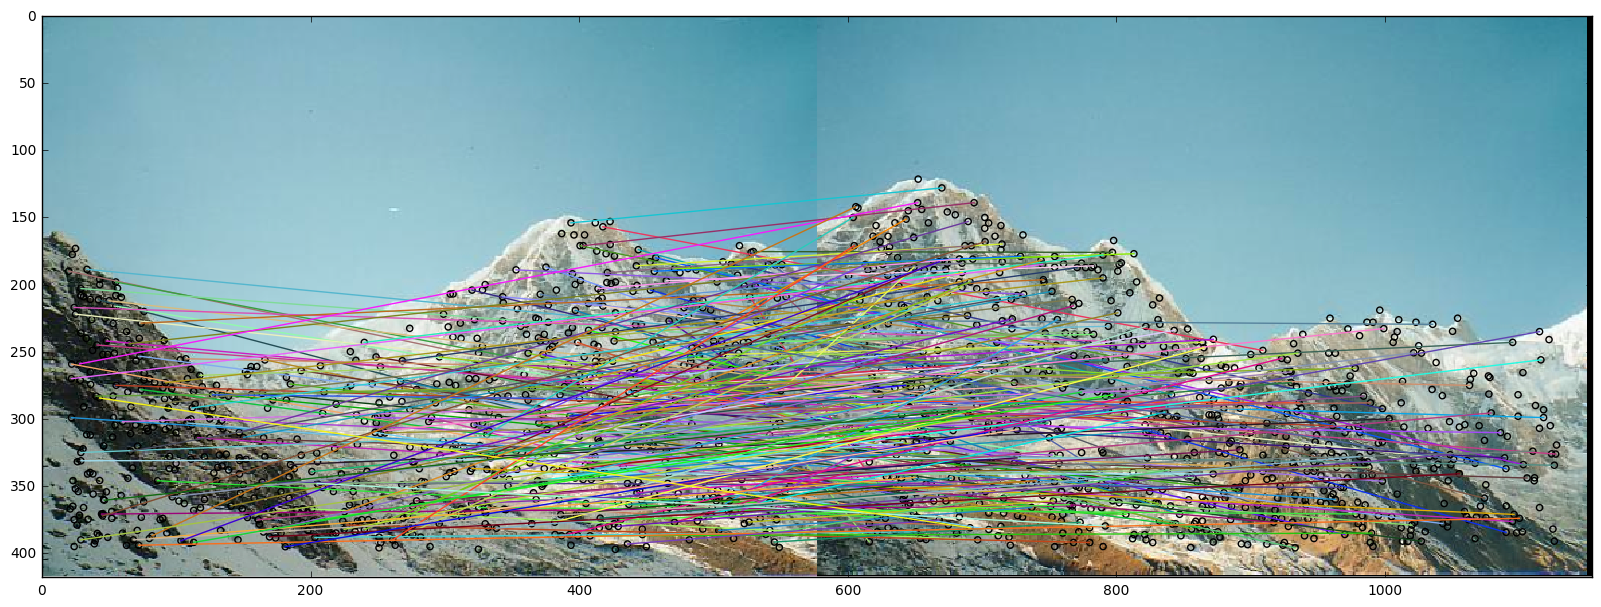

In [188]:
plt.figure(figsize=(20, 15))
feature.plot_matches(plt.axes(), img1, img2, kps1, kps2, matches)

### 3. Геометрическая валидация

In [249]:
transformation, mask = measure.ransac([kps2[:, ::-1][matches[:, 1]], kps1[:, ::-1][matches[:, 0]]],
                                            transform.ProjectiveTransform, min_samples=4, residual_threshold=5)

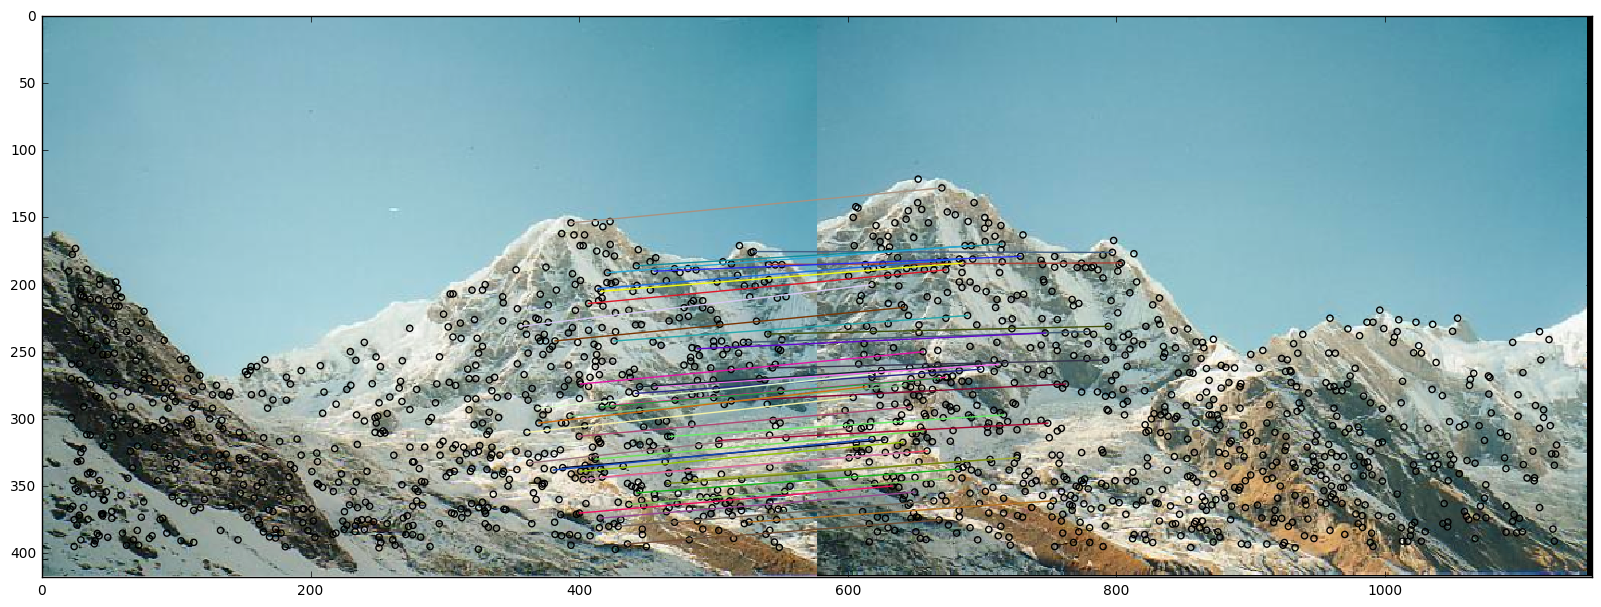

In [250]:
plt.figure(figsize=(20, 10))
feature.plot_matches(plt.axes(), img1, img2, kps1, kps2, matches[mask])

###  4. Визуализация панорамы

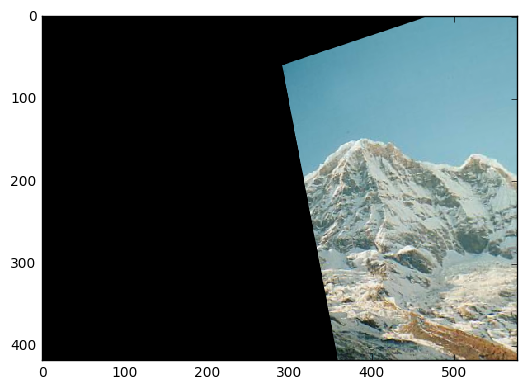

In [267]:
io.imshow(transform.warp(img2, inverse_map=transformation.inverse, output_shape=(img1.shape[0], img1.shape[1])))

In [256]:
h, w = img2.shape[0], img2.shape[1]
old_corners = np.array([[0, 0], [0, h], [w, 0], [h, w]])
transformed_corners = transformation(old_corners)
corners = np.concatenate((transformed_corners, old_corners))

In [257]:
offsets = (abs(np.min(corners[:, 0])), abs(np.min(new_corners[:, 1])))
offset = skimage.transform.SimilarityTransform(translation=offsets)

In [265]:
panoram_shape = (650, 1200)
transformed_img1 = skimage.transform.warp(img1, offset.inverse, output_shape=panoram_shape)
transformed_img2 = skimage.transform.warp(img2, (transformation + offset).inverse, output_shape=panoram_shape)
panoram = (transformed_img1 + transformed_img2) / 2

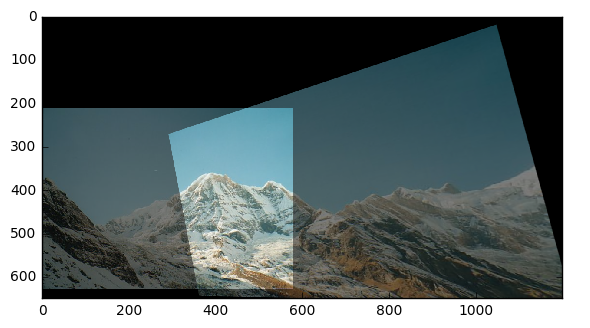

In [266]:
io.imshow(panoram)